In [7]:
import pandas as pd
import matplotlib.pyplot as plt

## Explore train dataset

In [29]:
data_folder = './data'

train = pd.read_csv(f'{data_folder}/train.csv')
train['seq_len'] = train.protein_sequence.str.len()
train.head()

,seq_id,protein_sequence,pH,data_source,tm,seq_len
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7,341
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5,286
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5,497
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2,265
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5,1451


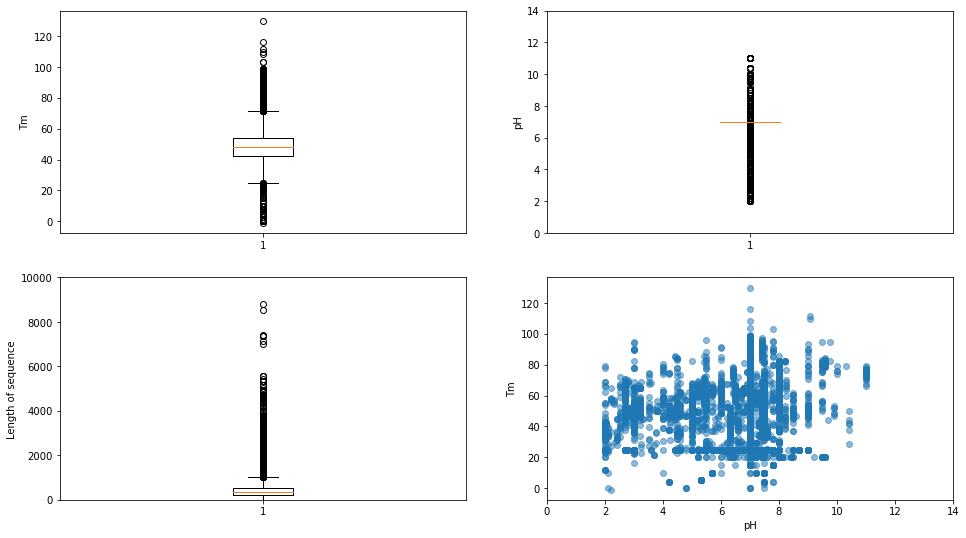

In [32]:
fig, axs = plt.subplots(2, 2, figsize=(16, 9))

axs[0,0].boxplot(train.tm)
axs[0,0].set_ylabel('Tm')

axs[0,1].boxplot(train[train.pH <=14].pH)
axs[0,1].set_ylim(0,14)
# axs[0,1].scatter(len(train.pH)*[1], train.pH, alpha=0.5)
axs[0,1].set_ylabel('pH')


axs[1,0].boxplot(train.seq_len)
axs[1,0].set_ylabel('Length of sequence')
axs[1,0].set_ylim(0,10000)

axs[1,1].scatter(train.pH, train.tm, alpha=0.5)
axs[1,1].set_xlim(0,14)
axs[1,1].set_xlabel('pH')
axs[1,1].set_ylabel('Tm')
plt.show()

## Explore test & submission dataset

The test set contains experimental melting temperature of over 2,413 single-mutation variant of an enzyme (GenBank: [KOC15878.1](https://www.ncbi.nlm.nih.gov/protein/KOC15878)), obtained by Novozymes A/S. The amino acid sequence of the wild type is:

VPVNPEPDATSVENVALKTGSGDSQSDPIKADLEVKGQSALPFDVDCWAILCKGAPNVLQRVNEKTKNSNRDRSGANKGPFKDPQKWGIKALPPKNPSWSAQDFKSPEEYAFASSLQGGTNAILAPVNLASQNSQGGVLNGFYSANKVAQFDPSKPQQTKGTWFQITKFTGAAGPYCKALGSNDKSVCDKNKNIAGDWGFDPAKWAYQYDEKNNKFNYVGK

It is a Deoxyribonuclease, or DNase for short, that catalyzes the hydrolytic cleavage of phosphodiester linkages in the DNA backbone, thus degrading DNA.

It is from species Aspergillus flavus (????), a fugus. 

### Explore test 
- Only single pH=8.0
- Only single mutation & single AA deletion

In [38]:
test = pd.read_csv(f'{data_folder}/test.csv')
test['seq_len'] = test.protein_sequence.str.len()
test.head()

,seq_id,protein_sequence,pH,data_source,seq_len
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes,220
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221


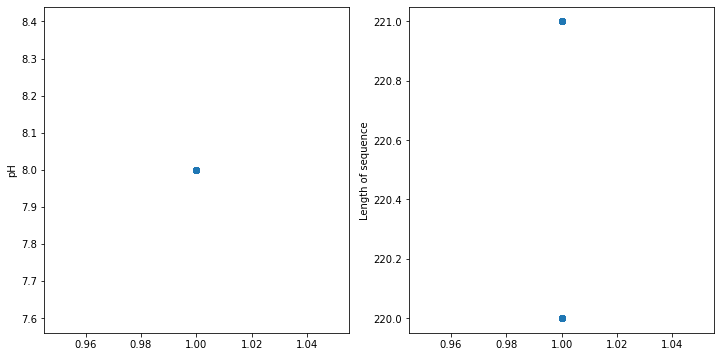

In [51]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# axs[0,0].boxplot(test.tm)
# axs[0,0].set_ylabel('Tm')

# axs[0].boxplot(test[test.pH <=14].pH)
# axs[0].set_ylim(0,14)
axs[0].scatter(len(test.pH)*[1], test.pH, alpha=0.5)
axs[0].set_ylabel('pH')


# axs[1].boxplot(test.seq_len)
axs[1].scatter(len(test.seq_len)*[1], test.seq_len, alpha=0.5)
axs[1].set_ylabel('Length of sequence')
# axs[1].set_ylim(0,10000)

# axs[1,1].scatter(test.pH, test.tm, alpha=0.5)
# axs[1,1].set_xlim(0,14)
# axs[1,1].set_xlabel('pH')
# axs[1,1].set_ylabel('Tm')
plt.show()

In [52]:
test.groupby('pH').count()

,seq_id,protein_sequence,data_source,seq_len,mutations,n_muts
pH,,,,,,
8,2413,2413,2413,2413,2413,2413


In [53]:
test.groupby('seq_len').count()

,seq_id,protein_sequence,pH,data_source,mutations,n_muts
seq_len,,,,,,
220,77,77,77,77,77,77
221,2336,2336,2336,2336,2336,2336


In [44]:
test_wt = 'VPVNPEPDATSVENVALKTGSGDSQSDPIKADLEVKGQSALPFDVDCWAILCKGAPNVLQRVNEKTKNSNRDRSGANKGPFKDPQKWGIKALPPKNPSWSAQDFKSPEEYAFASSLQGGTN' \
    'AILAPVNLASQNSQGGVLNGFYSANKVAQFDPSKPQQTKGTWFQITKFTGAAGPYCKALGSNDKSVCDKNKNIAGDWGFDPAKWAYQYDEKNNKFNYVGK'
def get_mutations(aa_seq, wt):
    muts = []
    if len(aa_seq) != len(wt):
        if len(aa_seq) <= len(wt):
            return f'{len(wt) - len(aa_seq)}del'
        if len(aa_seq) >= len(wt):
            return f'{len(aa_seq) - len(wt)}insertion'
    
    # point mutations
    for i in range(len(wt)):
        if wt[i] != aa_seq[i]:
            muts.append(f"{wt[i]}{i+1}{aa_seq[i]}")
    return '/'.join(muts)

test['mutations'] = [get_mutations(aa_seq, test_wt) for aa_seq in test.protein_sequence]

n_muts = []
for muts in test.mutations:
    if '/' in muts:
        n_muts.append(len(muts.split('/')))
    elif muts.strip() != '': #if muts is not None:
        n_muts.append(1)
    else:
        n_muts.append(0)
test['n_muts'] = n_muts
test.n_muts.min(), test.n_muts.max()

(0, 1)

In [46]:
test[test.n_muts==0]

,seq_id,protein_sequence,pH,data_source,seq_len,mutations,n_muts
1169,32559,VPVNPEPDATSVENVALKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221,,0


### Explore submission 

Submissions are evaluated on the Spearman's correlation coefficient between the ground truth and the predictions

Each seq_id represents a single-mutation variant of an enzyme. Your task is to rank the stability of these variants, assigning greater ranks to more stable variants. For each seq_id in the test set, you must predict the value for for the target tm. The file should contain a header and have the following format:

seq_id,tm  
31394,9.7  
31395,56.3  
31396,112.4  
etc.

In [37]:
submission = pd.read_csv(f'{data_folder}/sample_submission.csv')
print(f"{len(test)}, {len(submission)}")
submission.head()

2413, 2413


,seq_id,tm
0,31390,0
1,31391,1
2,31392,2
3,31393,3
4,31394,4
